# Отчет

Исходный код отчета (Python) на GitHub: [линк](https://github.com/Filareth2015/Tasks/blob/master/PlayKot.ipynb)

## 1. Общая информация о данных

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

%pylab inline

data = pd.read_excel('PLAYKOT_GDA.xlsx')

print 'Отчет описывает период с {} по {}'.format((data.values[:, 1].min()).date(), (data.values[:, 2].max()).date())
print 'Количество уникальных пользователей за период, чел.:', len(np.unique(data.values[:, 0]))
print 'Всего осуществлено пользователями платежей за период, руб:', sum(data.values[:, 10])

Populating the interactive namespace from numpy and matplotlib
Отчет описывает период с 2013-04-11 по 2013-07-22
Количество уникальных пользователей за период, чел.: 33863
Всего осуществлено пользователями платежей за период, руб: 4118626


## 2. Инфографика

### Влияние пола

In [2]:
# Data to plots
labels = u'Мужчины', u'Женщины', u'Пол не указан'
sizes = [len(data[data[u'Пол'] == 'male']), len(data[data[u'Пол'] == 'female']), len(data[data[u'Пол'].isnull()])]
colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode = (0.1, 0, 0)  

data['ProfitFromFirstWeek'] = pd.Series(data.values[:, 6])
TotalProfitFromFirstWeek = sum(data['ProfitFromFirstWeek'])
MaleProfitFromFirstWeek = sum(data[data[u'Пол'] == 'male'].ProfitFromFirstWeek.values)
FemaleProfitFromFirstWeek = sum(data[data[u'Пол'] == 'female'].ProfitFromFirstWeek.values)

data['ProfitFromSecondWeek'] = pd.Series(data.values[:, 7] - data.values[:, 6])
TotalProfitFromSecondWeek = sum(data['ProfitFromSecondWeek'])
MaleProfitFromSecondWeek = sum(data[data[u'Пол'] == 'male'].ProfitFromSecondWeek.values) 
FemaleProfitFromSecondWeek = sum(data[data[u'Пол'] == 'female'].ProfitFromSecondWeek.values)

data['ProfitFromThirdAndFourthWeeks'] = pd.Series(data.values[:, 8] - data.values[:, 7])
TotalProfitFromThirdAndFourthWeeks = sum(data['ProfitFromThirdAndFourthWeeks'])
MaleProfitFromThirdAndFourthWeeks = sum(data[data[u'Пол'] == 'male'].ProfitFromThirdAndFourthWeeks.values) 
FemaleProfitFromThirdAndFourthWeeks = sum(data[data[u'Пол'] == 'female'].ProfitFromThirdAndFourthWeeks.values)

data['ProfitFromSecondMonth'] = pd.Series(data.values[:, 9] - data.values[:, 8])
TotalProfitFromSecondMonth = sum(data['ProfitFromSecondMonth'])
MaleProfitFromSecondMonth = sum(data[data[u'Пол'] == 'male'].ProfitFromSecondMonth.values)
FemaleProfitFromSecondMonth = sum(data[data[u'Пол'] == 'female'].ProfitFromSecondMonth.values)

data['ProfitFromThirdMonth'] = pd.Series(data.values[:, 10] - data.values[:, 9])
TotalProfitFromThirdMonth = sum(data['ProfitFromThirdMonth'])
MaleProfitFromThirdMonth = sum(data[data[u'Пол'] == 'male'].ProfitFromThirdMonth.values)
FemaleProfitFromThirdMonth = sum(data[data[u'Пол'] == 'female'].ProfitFromThirdMonth.values)

N = 5
total = (TotalProfitFromFirstWeek, TotalProfitFromSecondWeek, TotalProfitFromThirdAndFourthWeeks, TotalProfitFromSecondMonth, TotalProfitFromThirdMonth)
men = (MaleProfitFromFirstWeek, MaleProfitFromSecondWeek, MaleProfitFromThirdAndFourthWeeks, MaleProfitFromSecondMonth, MaleProfitFromThirdMonth)
women = (FemaleProfitFromFirstWeek, FemaleProfitFromSecondWeek, FemaleProfitFromThirdAndFourthWeeks, FemaleProfitFromSecondMonth, FemaleProfitFromThirdMonth)

ind = np.arange(N)    
width = 0.35       


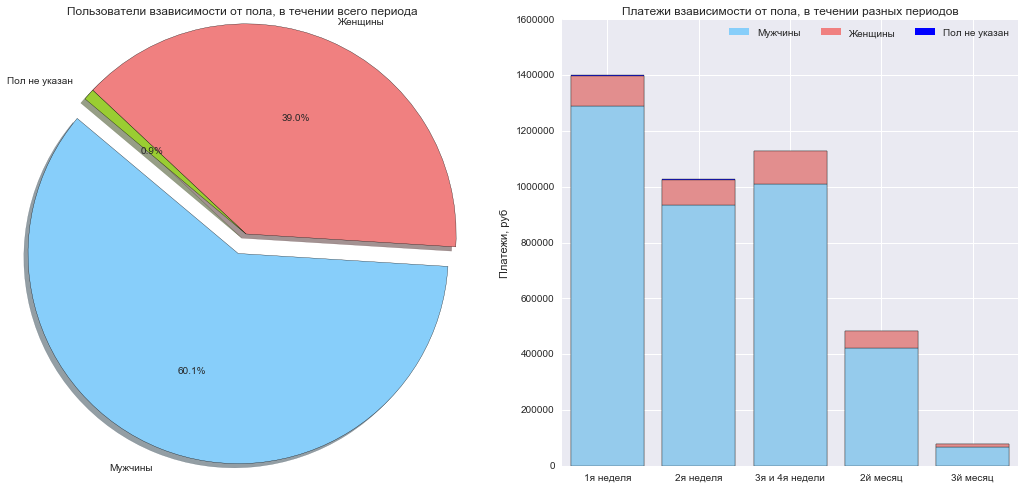

In [3]:
# Plots
plt.figure(figsize(18,8))

pylab.subplot(1,2,1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(u'Пользователи взависимости от пола, в течении всего периода')

pylab.subplot(1,2,2)

sns.set_style("white")

sns.barplot(x = ind, y = total, color = "blue")
sns.barplot(x = ind, y = men, color = "lightskyblue")
sns.barplot(x = ind, y = women, color = "lightcoral", bottom=men)

bar1 = plt.Rectangle((0,0),1,1,fc="lightskyblue", edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
l = plt.legend([bar1, bar2, bar3], [u'Мужчины', u'Женщины', u'Пол не указан'], loc=1, ncol = 3, prop={'size':10})
plt.title(u'Платежи взависимости от пола, в течении разных периодов')
plt.xticks(ind, (u'1я неделя', u'2я неделя', u'3я и 4я недели', u'2й месяц', u'3й месяц'))
plt.ylabel(u'Платежи, руб')
plt.grid(True)
l.draw_frame(False)


Выводы:   
1. Мужчины - большая часть аудитории. Мужчин в 1,5 раза больше, чем женщин: 60,1% (20362 чел.) и 39% (13203 чел.) соответсвенно.   
2. Мужчины также являются основным источником платежей. Мужчины платят в ~10 раз больше чем женщины.     
2. Пользователей без указания пола 0,9% (298 чел.). Вклад таких пользователй в платежи мизерный. В дальнейшем такие пользователи учитываться не будут.   
3. Судя по графику платежей, пользователи теряют интерес к игре в течении первых трех месяцев.

### Влияние возраста

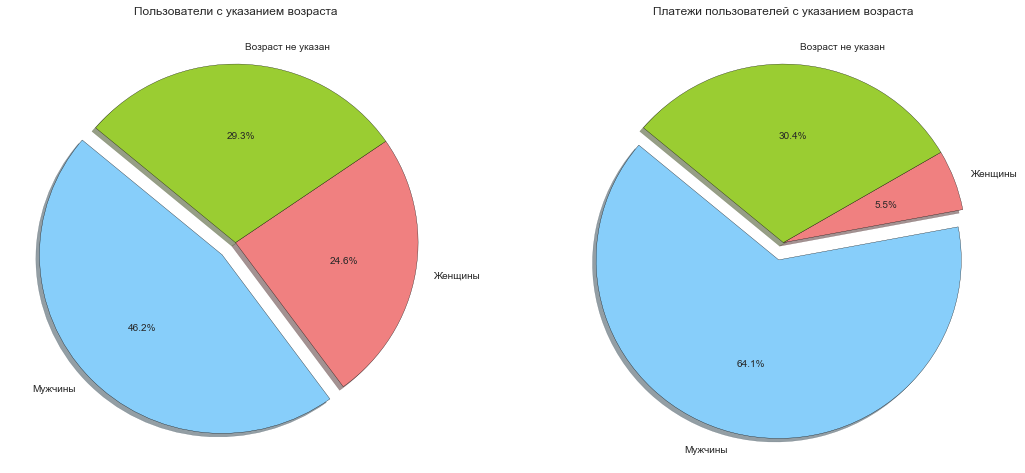

In [4]:
age = np.arange(1, 120)
dataWithAge = data[data[u'Возраст'].isin(age)]

labels = u'Мужчины', u'Женщины', u'Возраст не указан'
sizes = [len(dataWithAge[dataWithAge[u'Пол'] == 'male']), len(dataWithAge[dataWithAge[u'Пол'] == 'female']), len(data[data[u'Возраст'].isnull()])]
colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode = (0.1, 0, 0)

plt.figure(figsize(18,8))

pylab.subplot(1,2,1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(u'Пользователи с указанием возраста')


labels2 = u'Мужчины', u'Женщины', u'Возраст не указан'
sizes2 = [sum(dataWithAge[dataWithAge[u'Пол'] == 'male'].values[:, 10]), sum(dataWithAge[dataWithAge[u'Пол'] == 'female'].values[:, 10]), sum(data[data[u'Возраст'].isnull()].values[:, 10])]
colors2 = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode2 = (0.1, 0, 0)

pylab.subplot(1,2,2)
plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(u'Платежи пользователей с указанием возраста')


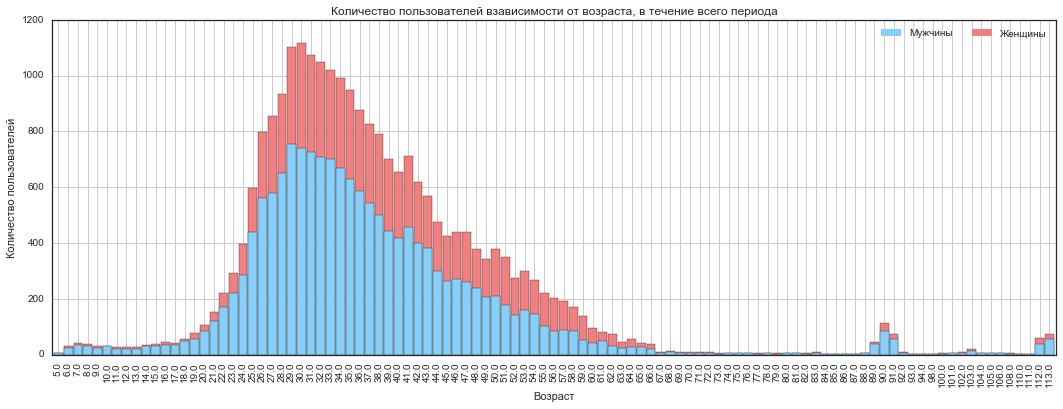

In [5]:
plt.figure(figsize(18,6))

bar1 = plt.Rectangle((0,0),1,1,fc="lightskyblue", edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')

data.groupby(u'Возраст')[u'Возраст'].agg(lambda x: len(x)).plot(kind='bar', width=0.9, color = "lightcoral")
data[data[u'Пол'] == 'male'].groupby(u'Возраст')[u'Возраст'].agg(lambda x: len(x)).plot(kind='bar', width=0.9, color = "lightskyblue")
l = plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.title(u'Количество пользователей взависимости от возраста, в течение всего периода')
plt.ylabel(u'Количество пользователей')
plt.grid(True)

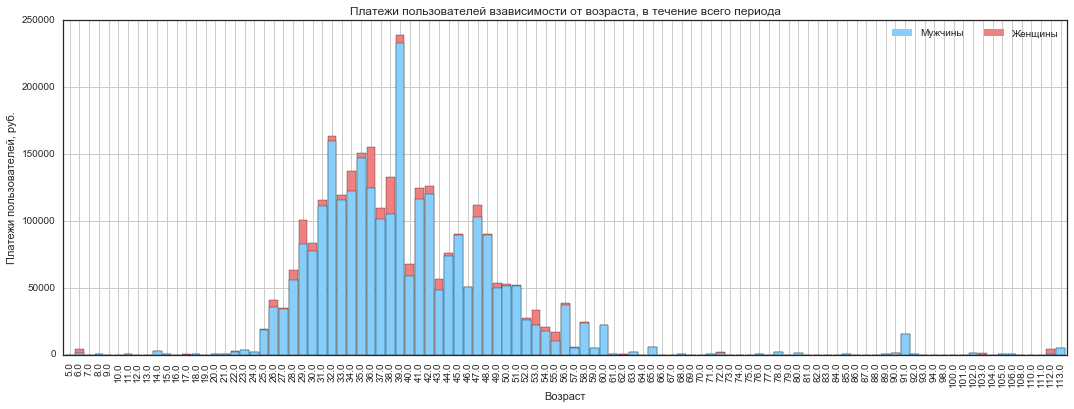

In [6]:
plt.figure(figsize(18,6))

bar1 = plt.Rectangle((0,0),1,1,fc="lightskyblue", edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')

data.groupby(u'Возраст')[u'Всего платежей (руб.)'].agg(np.sum).plot(kind='bar', width=0.9, color = "lightcoral")
data[data[u'Пол'] == 'male'].groupby(u'Возраст')[u'Всего платежей (руб.)'].agg(np.sum).plot(kind='bar', width=0.9, color = "lightskyblue")
l = plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.title(u'Платежи пользователей взависимости от возраста, в течение всего периода')
plt.ylabel(u'Платежи пользователей, руб.')
plt.grid(True)

Выводы:   
1. 70,8% пользователей указывают свой возраст (46,2% мужчины и 24,6% женщины) и они осуществляют 69,6% платежей (64,1% мужчины и 5,5% женщины).
2. 95% платежей приходится на возрастной диапазон от 22 до 60 лет.
3. 29,2% пользователей (23% от всех мужчин и 37% от всех женщин) не указывают свой возраст и они осуществляют 30,4% платежей.

### Влияние географии

In [14]:
formerUSSR = [u'RUSSIAN_FEDERATION', u'KAZAKHSTAN', u'TURKMENISTAN', u'UZBEKISTAN', u'ABHAZIA', u'ARMENIA', u'AZERBAIJAN', u'BELARUS', u'GEORGIA', u'TAJIKISTAN', u'UKRAINE', ]
dataFromFormerUSSR = data[data[u'Страна'].isin(formerUSSR)]

goldBillion = [u'AUSTRALIA', u'AUSTRIA', u'BELGIUM', u'CANADA', u'CYPRUS', u'CZECH_REPUBLIC', u'ESTONIA', u'FINLAND', u'FRANCE', u'GERMANY', u'GREECE', u'GREENLAND',u'HUNGARY', u'ICELAND',u'IRELAND', u'ISLE_OF_MAN', u'ISRAEL', u'ITALY',u'JAPAN', u'JERSEY',u'LATVIA', u'LITHUANIA', u'LUXEMBOURG',u'MONACO', u'MONTENEGRO', u'NETHERLANDS', u'NETHERLANDS_ANTILLES', u'NEW_ZEALAND', u'NORWAY', u'POLAND', u'PORTUGAL', u'ROMANIA',u'SPAIN', u'SWEDEN', u'SWITZERLAND', u'UNITED_KINGDOM', u'UNITED_STATES']
dataFromGoldBillion = data[data[u'Страна'].isin(goldBillion)]

otherCountries = list(set(np.unique(data.values[:, -7])) - set(formerUSSR + goldBillion))
dataFromOtherCountries = data[data[u'Страна'].isin(otherCountries)]

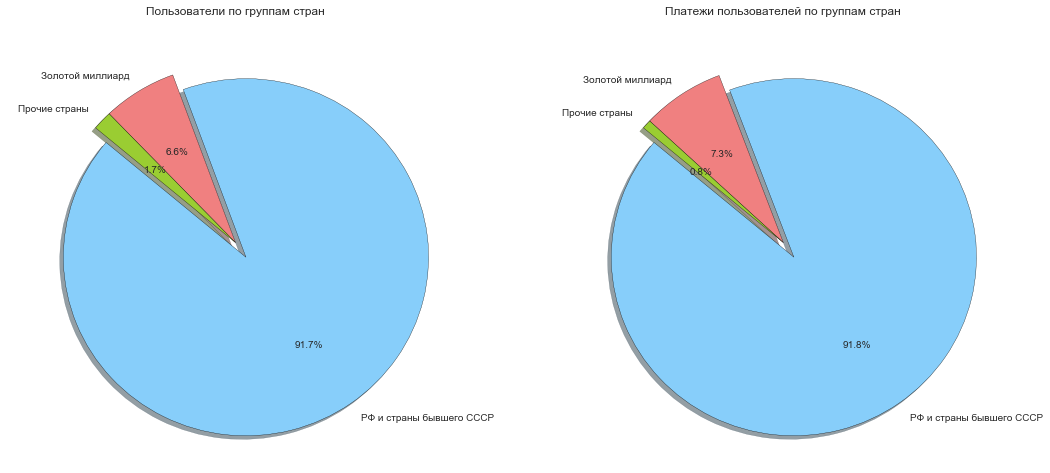

In [8]:
labels = u'РФ и страны бывшего СССР', u'Золотой миллиард', u'Прочие страны'
sizes = [len(dataFromFormerUSSR), len(dataFromGoldBillion), len(dataFromOtherCountries)]
colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode = (0.1, 0, 0)

plt.figure(figsize(18,8))

pylab.subplot(1,2,1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(u'Пользователи по группам стран')


labels2 = u'РФ и страны бывшего СССР', u'Золотой миллиард', u'Прочие страны'
sizes2 = [sum(dataFromFormerUSSR.values[:, 10]), sum(dataFromGoldBillion.values[:, 10]), sum(dataFromOtherCountries.values[:, 10])]
colors2 = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode2 = (0.1, 0, 0)

pylab.subplot(1,2,2)
plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(u'Платежи пользователей по группам стран')

In [9]:
print 'Количество пользователей из РФ и стран бывшего СССР, кроме Прибалтики, чел.:', len(dataFromFormerUSSR)
print 'Платежи от пользователей из РФ и стран бывшего СССР, кроме Прибалтики, руб.:', int(sum(dataFromFormerUSSR[[u'Всего платежей (руб.)']]))

Количество пользователей из РФ и стран бывшего СССР, кроме Прибалтики, чел.: 31050
Платежи от пользователей из РФ и стран бывшего СССР, кроме Прибалтики, руб.: 3782345


In [10]:
print 'Количество пользователей из стран "Золотого миллиарда" (включая Прибалтику и восточно-европейские страны), чел.:', len(dataFromGoldBillion)
print 'Платежи от пользователей из стран "Золотого миллиарда"(включая Прибалтику и восточно-европейские страны), руб.:', int(sum(dataFromGoldBillion[[u'Всего платежей (руб.)']]))

Количество пользователей из стран "Золотого миллиарда" (включая Прибалтику и восточно-европейские страны), чел.: 2230
Платежи от пользователей из стран "Золотого миллиарда"(включая Прибалтику и восточно-европейские страны), руб.: 302645


In [11]:
print 'Количество пользователей из прочих стран, чел.:', len(dataFromOtherCountries)
print 'Платежи от пользователей из прочих стран, руб.:', int(sum(dataFromOtherCountries[[u'Всего платежей (руб.)']]))

Количество пользователей из прочих стран, чел.: 583
Платежи от пользователей из прочих стран, руб.: 33636


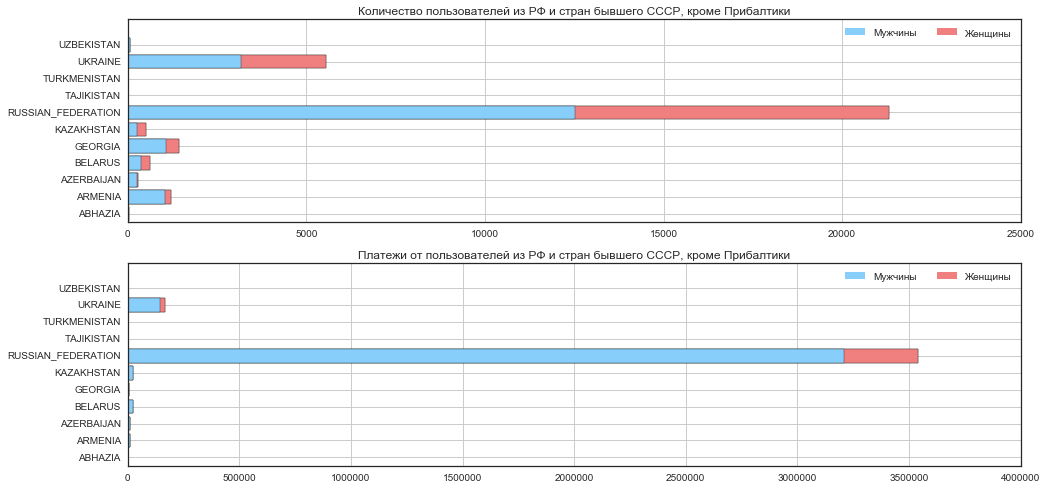

In [12]:
plt.figure(figsize(16,8))

plt.subplot(2,1,1)
N = len(np.unique(dataFromFormerUSSR.values[:, -7]))
valTotal = dataFromFormerUSSR.groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))  
valMen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'] == 'male'].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
valWomen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
pos = np.arange(N)+.5    

plt.barh(pos,valTotal, align='center', color = "blue")
plt.barh(pos,valWomen, align='center', color = "lightcoral")
plt.barh(pos,valMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(formerUSSR))
plt.title(u'Количество пользователей из РФ и стран бывшего СССР, кроме Прибалтики')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

plt.subplot(2,1,2)
N = len(np.unique(dataFromFormerUSSR.values[:, -7]))
valSum = dataFromFormerUSSR.groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)  
valSumMen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'] == 'male'].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
valSumWomen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
pos = np.arange(N)+.5    

plt.barh(pos,valSum, align='center')
plt.barh(pos,valSumWomen, align='center', color = "lightcoral")
plt.barh(pos,valSumMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(formerUSSR))
plt.title(u'Платежи от пользователей из РФ и стран бывшего СССР, кроме Прибалтики')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

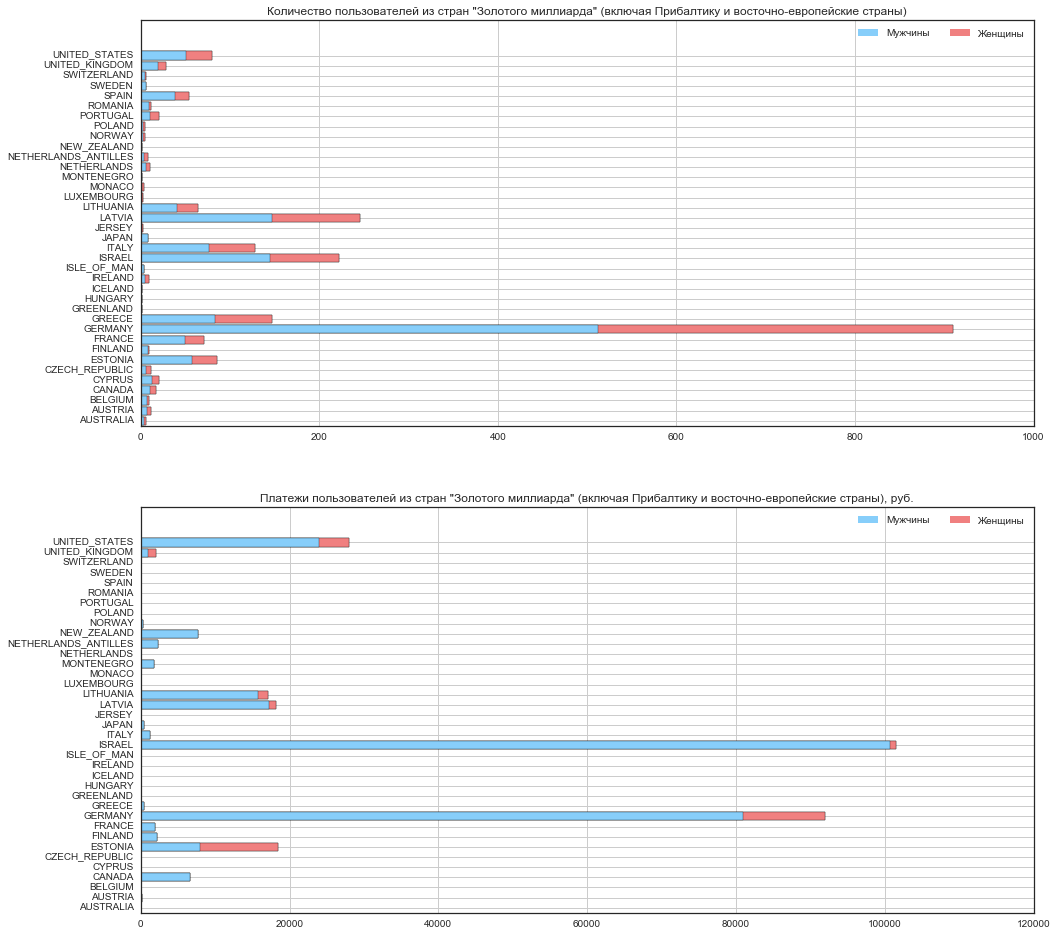

In [13]:
plt.figure(figsize(16,16))

plt.subplot(2,1,1)
N = len(np.unique(dataFromGoldBillion.values[:, -7]))
valTotal = dataFromGoldBillion.groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))  
valMen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'] == 'male'].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
valWomen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
pos = np.arange(N)+.5    

plt.barh(pos,valTotal, align='center', color = "blue")
plt.barh(pos,valWomen, align='center', color = "lightcoral")
plt.barh(pos,valMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(goldBillion))
plt.title(u'Количество пользователей из стран "Золотого миллиарда" (включая Прибалтику и восточно-европейские страны)')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

plt.subplot(2,1,2)
N = len(np.unique(dataFromGoldBillion.values[:, -7]))
valSum = dataFromGoldBillion.groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)  
valSumMen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'] == 'male'].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
valSumWomen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
pos = np.arange(N)+.5    

plt.barh(pos,valSum, align='center', color = "blue")
plt.barh(pos,valSumWomen, align='center', color = "lightcoral")
plt.barh(pos,valSumMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(goldBillion))
plt.title(u'Платежи пользователей из стран "Золотого миллиарда" (включая Прибалтику и восточно-европейские страны), руб.')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

Выводы:    
1. Подавляющая часть пользователей проживает в странах бывшего СССР или странах, где есть большие русско-говорящие диаспоры. Подавляющая часть платежей также поступает из этих стран.   
2. На одного пользователя из стран "Золотого миллиарда" (включая Прибалтику и восточно-европейские страны) приходится наибольший средний платеж - 135 руб на 1 чел. В РФ и странах бывшего СССР, кроме Прибалтики, приходится 121 руб на 1 чел. В прочих странах приходится всего 57 руб на 1 чел.

## 3. Рекомендации по дальнейшему развитию и продвижению игры

Для увеличения количества платежей:
1. Необходимо локализовать игру под языки "Золотого миллиарда" (английский, прежде всего) и распространять ее в социальных сетях, наиболее распространенных в этих странах (прежде всего в Facebook).
2. Необходимо расширять геймплей, с целью удержания интереса пользователя к игре.
3. Необходимо стимулировать женскую часть аудитории к совершению платежей. Например, за счет введения гендерных различий героев.

## 4.Тикет для расчета показателя LTV пользователя

Примечания:
1. В качестве методики расчета LTV использовано описание из [статьи п.3](https://habrahabr.ru/post/292312/)
2. Ввиду отсутствия информации о интерфейсе полное описание основного и альтернативных сценариев работы пользователя в создаваемом решении не представляется возможным. Поэтому ограничусь только исходным состоянием, скриптом и как тестировать результат.

### Текст тикета

Назначение:   
Расчет LTV указанного пользователя.

Исходное состояние: 
1. Используется Python 2.7 с стандартными библиотеками для анализа данных (см. ниже).    
2. Сформированный датасет загружен. Столбцы, их порядок и наименования должны полностью соответствовать датасету из тестового задания.

Последовательность действий:
1. Пользователь вводит текущую дату. По умолчанию: 2013-05-30.
2. Пользователь длительность периода неактивности. По умолчанию: 14 дней.
3. Пользователь вводит id игрока, для которого необходимо рассчитать LTV. По умолчанию: 170698870.
4. Пользователь запускает скрипт.
5. Скрипт рассчитывает LTV.

Текст скрипта:    
Во вложении.

Как тестировать:    
Загрузив датасет из тестового задания, после выполнения скрипта с установками по умолчанию, должно быть получено значение LTV = 329.0

<script type="text/javascript">
    $('div.input').hide();
</script>

<style>
div.prompt {display:none}
</style>